### Nama : Wilson Boyaron Hutagalung
### Nim  : 2209106035
### Kelas: Praktikum KB A2
### Posttest 6

## Melakukan Import Dataset

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

## Melakukan Pembacaan File Dataset yang digunakan

In [542]:
df = pd.read_csv("brain_stroke.csv")

## Menampilkan 10 data teratas

In [543]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Cleaning

In [544]:
df.drop_duplicates(inplace=True)

## Data Processing

In [545]:
# Melakukan normalisasi data
min_max_scaler = MinMaxScaler()
df[['avg_glucose_level', 'bmi']] = min_max_scaler.fit_transform(df[['avg_glucose_level', 'bmi']])

# Mengubah data kategorikal menjadi numerikal
col=['gender','work_type','Residence_type','smoking_status','ever_married']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,0.801265,0.647564,1,1
1,1,80.0,0,1,1,1,0,0.234512,0.530086,2,1
2,0,49.0,0,0,1,1,1,0.536008,0.584527,3,1
3,0,79.0,1,0,1,2,0,0.549349,0.286533,2,1
4,1,81.0,0,0,1,1,1,0.605161,0.429799,1,1
5,1,74.0,1,1,1,1,0,0.069107,0.383954,2,1
6,0,69.0,0,0,0,1,1,0.181285,0.252149,2,1
7,0,78.0,0,0,1,1,1,0.015927,0.292264,0,1
8,0,81.0,1,0,1,1,0,0.116841,0.449857,2,1
9,0,61.0,0,1,1,0,0,0.301634,0.653295,3,1


## Data Split

In [546]:
X = df.drop('stroke', axis=1) # Feature
y = df['stroke'] # Target

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [548]:
print(f'panjang x train: {len(X_train)}\n')
print(f'panjang x test: {len(X_test)}\n')
print(f'panjang y train: {len(y_train)}\n')
print(f'panjang y test: {len(y_test)}\n')

panjang x train: 3984

panjang x test: 997

panjang y train: 3984

panjang y test: 997



## Melakukan Encoding

In [549]:
L = LabelEncoder()
y = L.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Melakukan Modeling Neural Network

In [550]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 330.8 KB


In [551]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### input_dim = 19 karena ada 19 kolom/atribut

#### output layer menggunakan activation sigmoid dan menggunakan 1 neuron karena target hanya memiliki dua kelas

In [552]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 16)                176       
                                                                 
 dense_121 (Dense)           (None, 32)                544       
                                                                 
 dense_122 (Dense)           (None, 64)                2112      
                                                                 
 dense_123 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2897 (11.32 KB)
Trainable params: 2897 (11.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fungsi Call Back

In [553]:
monitor_callbacks = EarlyStopping(monitor='val_accuracy', patience=10)

## Melakukan Compile Model

In [554]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## Melakukan Fitting Model

In [555]:
model_training = model.fit(
                    x = X_train,
                    y = y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=16, 
                    verbose=1,
                    callbacks=[monitor_callbacks]
                )

Epoch 1/50


249/249 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.9182 - val_loss: 0.2834 - val_accuracy: 0.9428
Epoch 2/50
249/249 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9521 - val_loss: 0.2244 - val_accuracy: 0.9428
Epoch 3/50
249/249 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9521 - val_loss: 0.2140 - val_accuracy: 0.9428
Epoch 4/50
249/249 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9521 - val_loss: 0.2004 - val_accuracy: 0.9428
Epoch 5/50
249/249 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9521 - val_loss: 0.2165 - val_accuracy: 0.9428
Epoch 6/50
249/249 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9518 - val_loss: 0.1984 - val_accuracy: 0.9428
Epoch 7/50
249/249 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9508 - val_loss: 0.2034 - val_accuracy: 0.9428
Epoch 8/50
249/24

## Evaluasi Model

In [556]:
score = model.evaluate(X_test, y_test)
print("test loss = ", score[0])
print("test accuracy = ", score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9428
test loss =  0.20340198278427124
test accuracy =  0.9428284764289856


In [557]:
print(classification_report(y_test, model.predict(X_test).round(), target_names=['1', '0']))

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       940
           0       0.00      0.00      0.00        57

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Grafik Pergerakan akurasi dan loss pada saat training dan validation

Text(0, 0.5, 'loss')

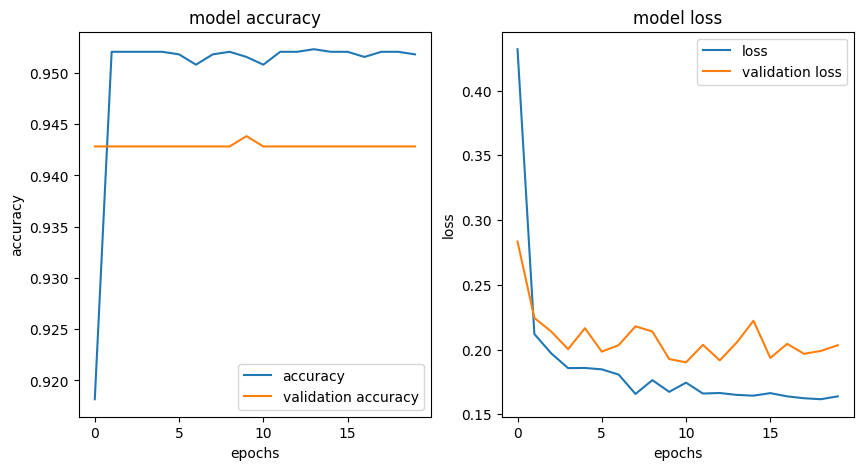

In [558]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(model_training.history['accuracy'], label='accuracy')
plt.plot(model_training.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(model_training.history['loss'], label='loss')
plt.plot(model_training.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")